The first step in any data analysis is to load the data. We'll be using a Python library called pandas, which is a powerful tool for data manipulation and analysis. Let's start by importing this library and loading your data.

In [ ]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/Krishna2709/Noteable-ChatGPT/master/WildBlueberryPollinationSimulationData.csv'
df = pd.read_csv(data_url)
df.head()

Here are some basic statistics for each column:

In [ ]:
# Check the shape of the data
print('Shape of the data:', df.shape)

# Check for missing values
print('\nMissing values in each column:\n', df.isnull().sum())

# Get some basic statistics for each column
df.describe()

Shape of the data: (777, 18)

Missing values in each column:
 Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Heatmap of Variables')

NameError: name 'np' is not defined

Here is the correlation heatmap of the variables:

Text(0.5, 1.0, 'Correlation Heatmap of Variables')

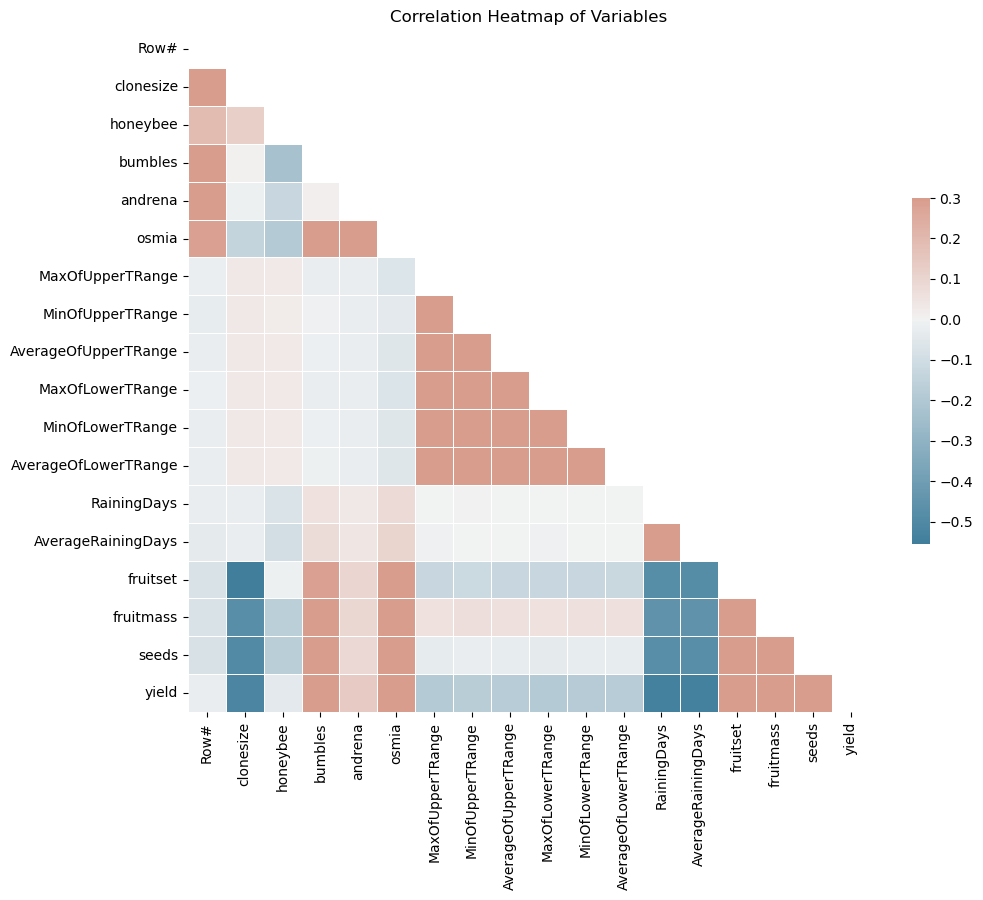

In [ ]:
import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Heatmap of Variables')

Here is the distribution of the yield:

Text(0.5, 1.0, 'Distribution of Yield')

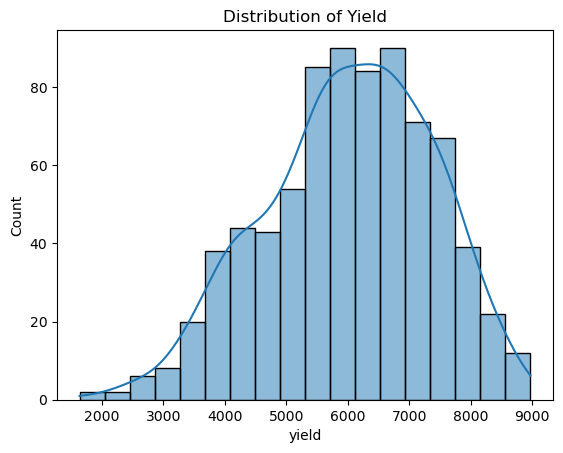

In [ ]:
# Plot the distribution of the yield
sns.histplot(df['yield'], kde=True)
plt.title('Distribution of Yield')

Here are the scatter plots of 'fruitset', 'fruitmass', 'seeds', 'RainingDays', and 'AverageRainingDays' against 'yield':

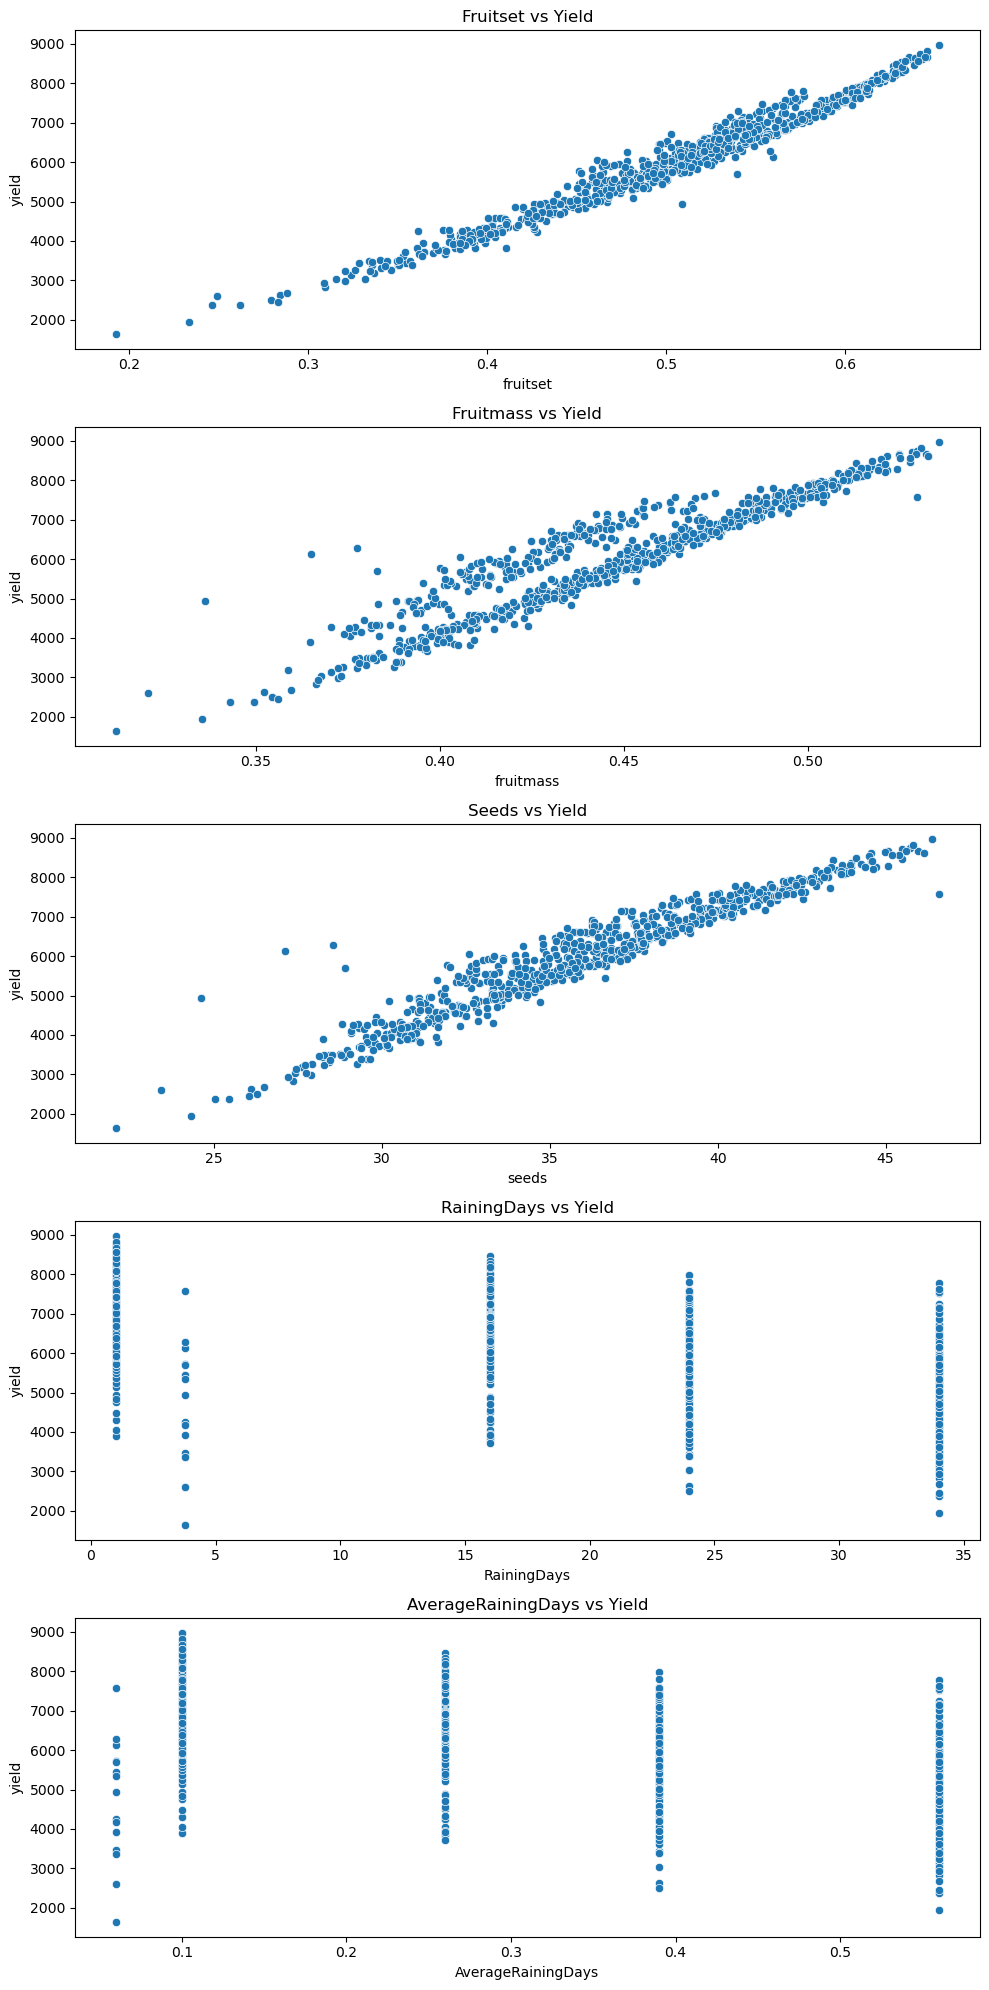

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Plot fruitset vs yield
sns.scatterplot(data=df, x='fruitset', y='yield', ax=axs[0])
axs[0].set_title('Fruitset vs Yield')

# Plot fruitmass vs yield
sns.scatterplot(data=df, x='fruitmass', y='yield', ax=axs[1])
axs[1].set_title('Fruitmass vs Yield')

# Plot seeds vs yield
sns.scatterplot(data=df, x='seeds', y='yield', ax=axs[2])
axs[2].set_title('Seeds vs Yield')

# Plot RainingDays vs yield
sns.scatterplot(data=df, x='RainingDays', y='yield', ax=axs[3])
axs[3].set_title('RainingDays vs Yield')

# Plot AverageRainingDays vs yield
sns.scatterplot(data=df, x='AverageRainingDays', y='yield', ax=axs[4])
axs[4].set_title('AverageRainingDays vs Yield')

plt.tight_layout()

Here are the boxplots of 'yield' for different levels of 'clonesize', 'honeybee', 'bumbles', 'andrena', and 'osmia':

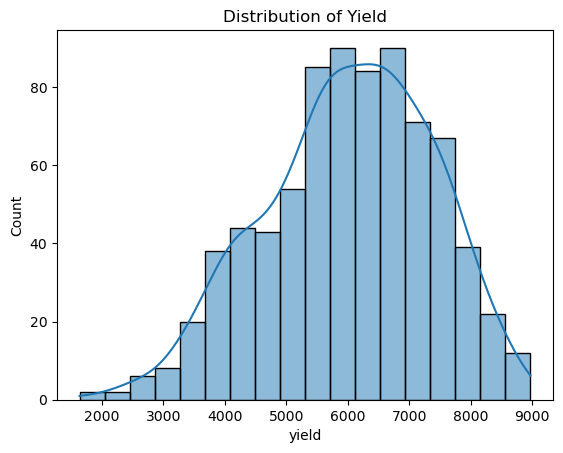

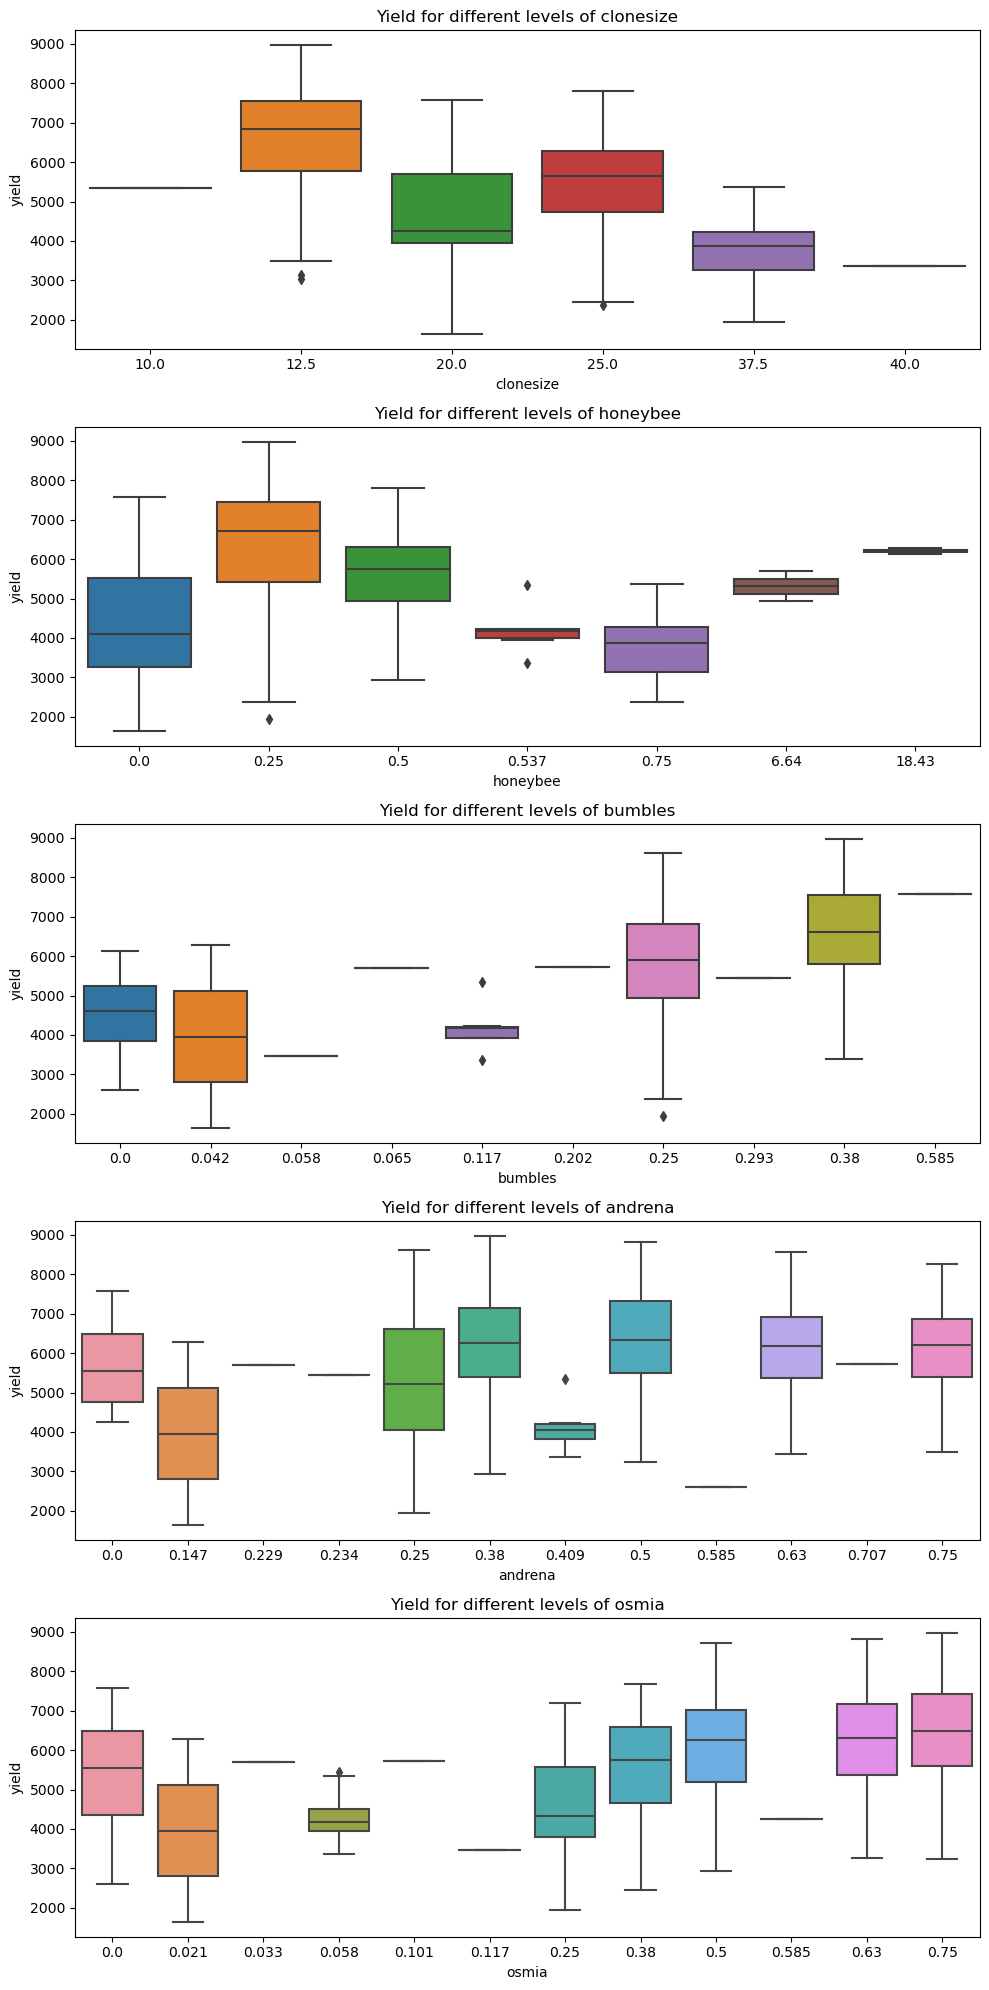

In [ ]:
# Plot the distribution of the yield
sns.histplot(df['yield'], kde=True)
plt.title('Distribution of Yield')

# Create boxplots of yield for different levels of the other variables
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

variables = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia']

for i, var in enumerate(variables):
    sns.boxplot(data=df, x=var, y='yield', ax=axs[i])
    axs[i].set_title('Yield for different levels of ' + var)

plt.tight_layout()

Here are the results of the multiple linear regression analysis:

In [ ]:
import statsmodels.api as sm

# Define the dependent variable
y = df['yield']

# Define the independent variables
X = df.drop(['yield', 'Row#'], axis=1)

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6590.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        13:25:14   Log-Likelihood:                -4839.9
No. Observations:                 777   AIC:                             9710.
Df Residuals:                     762   BIC:                             9780.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  809.9268 

Here are the Variance Inflation Factor (VIF) values for each independent variable:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF for each independent variable
print(vif)

                variable         VIF
0                  const    0.000000
1              clonesize    3.800417
2               honeybee    3.479346
3                bumbles    2.232211
4                andrena    1.277828
5                  osmia    1.885464
6       MaxOfUpperTRange         inf
7       MinOfUpperTRange         inf
8   AverageOfUpperTRange         inf
9       MaxOfLowerTRange         inf
10      MinOfLowerTRange         inf
11  AverageOfLowerTRange         inf
12           RainingDays   64.103199
13    AverageRainingDays   71.317751
14              fruitset   80.871479
15             fruitmass  764.374648
16                 seeds  566.708415


Let's proceed with the ridge regression approach.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict the yield on the test set
y_pred = ridge.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 163.34999900754568
